In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the data set
input_data = "Resources/cosmetics_data.csv"
cosmetics_df = pd.read_csv(input_data, low_memory=False)
cosmetics_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [3]:
# Remove unnecessary columns
columns_to_drop = ["CDPHId", "CSFId", "CompanyId", "PrimaryCategoryId", "SubCategoryId", "CasId", "ChemicalId"]
cosmetics_cleaned_df = cosmetics_df.drop(columns=columns_to_drop)
cosmetics_cleaned_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),65996-92-1,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),140-67-0,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,13463-67-7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,13463-67-7,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
# Change dates to datetime objects
cosmetics_cleaned_df["InitialDateReported"] = pd.to_datetime(cosmetics_cleaned_df["InitialDateReported"])
cosmetics_cleaned_df["MostRecentDateReported"] = pd.to_datetime(cosmetics_cleaned_df["MostRecentDateReported"])
cosmetics_cleaned_df["DiscontinuedDate"] = pd.to_datetime(cosmetics_cleaned_df["DiscontinuedDate"])
cosmetics_cleaned_df["ChemicalCreatedAt"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalCreatedAt"])
cosmetics_cleaned_df["ChemicalUpdatedAt"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalUpdatedAt"])
cosmetics_cleaned_df["ChemicalDateRemoved"] = pd.to_datetime(cosmetics_cleaned_df["ChemicalDateRemoved"])
cosmetics_cleaned_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),65996-92-1,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),140-67-0,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [5]:
cosmetics_cleaned_df.shape

(114635, 15)

In [6]:
print(cosmetics_cleaned_df.duplicated().sum())

7692


In [7]:
cosmetics_cleaned_df = cosmetics_cleaned_df.drop_duplicates()
cosmetics_cleaned_df.shape

(106943, 15)

In [8]:
cosmetics_cleaned_df.nunique()

ProductName               33716
CSF                       34326
CompanyName                 606
BrandName                  2713
PrimaryCategory              13
SubCategory                  89
CasNumber                   125
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

In [10]:
# Extract the year from the date columns
cosmetics_cleaned_df['YearReported'] = cosmetics_cleaned_df['InitialDateReported'].dt.year
cosmetics_cleaned_df['YearCreated'] = cosmetics_cleaned_df['ChemicalCreatedAt'].dt.year
cosmetics_cleaned_df['YearMostRecent'] = cosmetics_cleaned_df['MostRecentDateReported'].dt.year
cosmetics_cleaned_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,CasNumber,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,YearReported,YearCreated,YearMostRecent
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",13463-67-7,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,2009,2009,2013
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),65996-92-1,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2,2009,2009,2009
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),140-67-0,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2,2009,2009,2009
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1,2009,2009,2013
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,13463-67-7,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,2009,2009,2013


In [11]:
# Count the number of reports for each year
yearly_report_count = cosmetics_cleaned_df['YearReported'].value_counts().sort_index()
yearly_report_count

YearReported
2009    28134
2010    13685
2011     4181
2012     3594
2013     6130
2014     8258
2015     7610
2016     4408
2017     6992
2018     9248
2019    12230
2020     2473
Name: count, dtype: int64

In [22]:
# Convert to a DataFrame for easier plotting
yearly_report_df = yearly_report_count.reset_index()
yearly_report_df.columns = ['Year', 'ReportCount']
yearly_report_df

,Year,ReportCount
0,2009,28134
1,2010,13685
2,2011,4181
3,2012,3594
4,2013,6130
5,2014,8258
6,2015,7610
7,2016,4408
8,2017,6992
9,2018,9248


In [23]:
# Exclude 2020 from the data
yearly_report_df = yearly_report_df[yearly_report_df['Year'] < 2020]
yearly_report_df

,Year,ReportCount
0,2009,28134
1,2010,13685
2,2011,4181
3,2012,3594
4,2013,6130
5,2014,8258
6,2015,7610
7,2016,4408
8,2017,6992
9,2018,9248


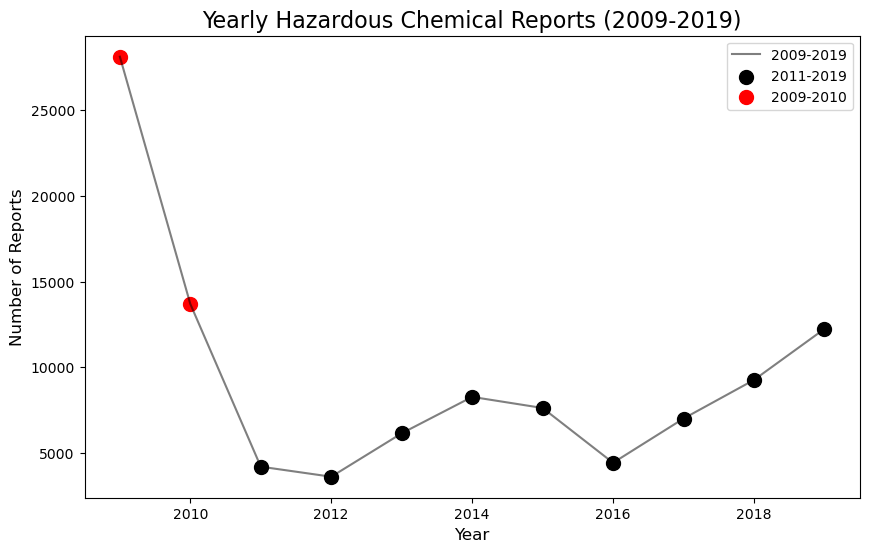

In [24]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the line for all years from 2009 to 2019 in light black (gray)
plt.plot(yearly_report_df['Year'], 
         yearly_report_df['ReportCount'], 
         color='black', alpha=0.5, label='2009-2019')

# Add large black circle markers for the years 2011-2019
plt.scatter(yearly_report_df[yearly_report_df['Year'] > 2010]['Year'], 
            yearly_report_df[yearly_report_df['Year'] > 2010]['ReportCount'], 
            s=100, color='black', label='2011-2019')

# Add red circle markers for the years 2009-2010
plt.scatter(yearly_report_df[yearly_report_df['Year'].isin([2009, 2010])]['Year'], 
            yearly_report_df[yearly_report_df['Year'].isin([2009, 2010])]['ReportCount'], 
            s=100, color='red', label='2009-2010')

# Labels and Title
plt.title('Yearly Hazardous Chemical Reports (2009-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.legend()

# Display the plot
plt.show()